In [1]:
# import
from rdkit.Chem import AllChem as Chem
#from rdkit import Chem  # zde nema smysl, zahrnuto vyse
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors  # knihovna pro deskriptory
from rdkit.Chem import rdMolDescriptors as rdescriptors  # druha knihovna pro deskriptory

import pandas as pd
import seaborn as sns
import csv

C:\Users\pslav\AppData\Local\Temp\ipykernel_9404\472794601.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# nacteni set1 (drugbank)
drugbank = [mol for mol in Chem.SDMolSupplier('../data/drugbank.sdf') if mol]

[20:04:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[20:04:42] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[20:04:43] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[20:04:43] ERROR: Could not sanitize molecule ending on line 250947
[20:04:43] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[20:04:43] Explicit valence for atom # 17 O, 3, is greater than permitted
[20:04:43] ERROR: Could not sanitize molecule ending on line 258130
[20:04:43] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[20:04:43] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[20:04:43] ERROR: Could not sanitize molecule ending on line 261581
[20:04:43] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[20:04:43] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[20:04:43] ERROR: Could not 

In [3]:
# nacteni set2 (mtor)
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

In [4]:
# Lipinski's rule
def too_many_hba(mol):
    return Descriptors.NumHAcceptors(mol)>10
def too_many_hbd(mol):
    return Descriptors.NumHDonors(mol)>5
def too_heavy(mol):
    return Descriptors.MolWt(mol)>500
def too_greasy(mol):
    return Descriptors.MolLogP(mol)>5

In [5]:
mtor_data = pd.DataFrame([{'mol': mol,
                          'source': 'mtor',
                          'too_many_hba': int(too_many_hba(mol)),
                          'too_many_hbd': int(too_many_hbd(mol)),
                          'too_heavy': int(too_heavy(mol)),
                          'too_greasy': int(too_greasy(mol))} for mol in mtor_ligands])

In [6]:
#mtor_data

In [23]:
drugbank_data = pd.DataFrame([{'mol': mol,
                              'source': 'drugbank',
                              'too_many_hba': too_many_hba(mol),
                              'too_many_hbd': too_many_hbd(mol),
                              'too_heavy': too_heavy(mol),
                              'too_greasy': too_greasy(mol)} for mol in drugbank])

In [24]:
#drugbank_data

In [25]:
mtor_data.describe()

,too_many_hba,too_many_hbd,too_heavy,too_greasy,too_many_rot_b,too_big_pol_s
count,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000
mean,0.042646,0.000870,0.295474,0.048520,0.003264,0.070931
std,0.202079,0.029492,0.456305,0.214887,0.057042,0.256738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
mtor_data['ro5'] = mtor_data.apply(lambda row: sum(row[['too_many_hba', 'too_many_hbd', 'too_heavy', 'too_greasy']])>1, axis=1)

In [11]:
drugbank_data['ro5'] = drugbank_data.apply(lambda row: sum(row[['too_many_hba', 'too_many_hbd', 'too_heavy', 'too_greasy']])>1, axis=1)

In [12]:
mtor_data

,mol,source,too_many_hba,too_many_hbd,too_heavy,too_greasy,ro5
0,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False
1,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False
2,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False
3,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False
4,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False
...,...,...,...,...,...,...,...
4591,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False
4592,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False
4593,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False
4594,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False


In [13]:
# Veber's rule
def too_many_rot_b(mol):
    return Descriptors.NumRotatableBonds(mol)>10
def too_big_pol_s(mol):
    return rdescriptors.CalcTPSA(mol)>140

In [14]:
mtor_data['too_many_rot_b'] = mtor_data.apply(lambda row: int(too_many_rot_b(row['mol'])), axis=1)
mtor_data['too_big_pol_s'] = mtor_data.apply(lambda row: int(too_big_pol_s(row['mol'])), axis=1)
mtor_data['vr2'] = mtor_data.apply(lambda row: sum(row[['too_many_rot_b', 'too_big_pol_s']])>0, axis=1)

In [15]:
drugbank_data['too_many_rot_b'] = drugbank_data.apply(lambda row: int(too_many_rot_b(row['mol'])), axis=1)
drugbank_data['too_big_pol_s'] = drugbank_data.apply(lambda row: int(too_big_pol_s(row['mol'])), axis=1)
drugbank_data['vr2'] = drugbank_data.apply(lambda row: sum(row[['too_many_rot_b', 'too_big_pol_s']])>0, axis=1)

In [16]:
mtor_data

,mol,source,too_many_hba,too_many_hbd,too_heavy,too_greasy,ro5,too_many_rot_b,too_big_pol_s,vr2
0,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False
1,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False
2,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False
3,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False
4,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False
...,...,...,...,...,...,...,...,...,...,...
4591,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False
4592,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False
4593,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False
4594,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False


C:\Users\pslav\AppData\Local\Temp\ipykernel_9404\2812869168.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(data=mtor_data, ci=None)


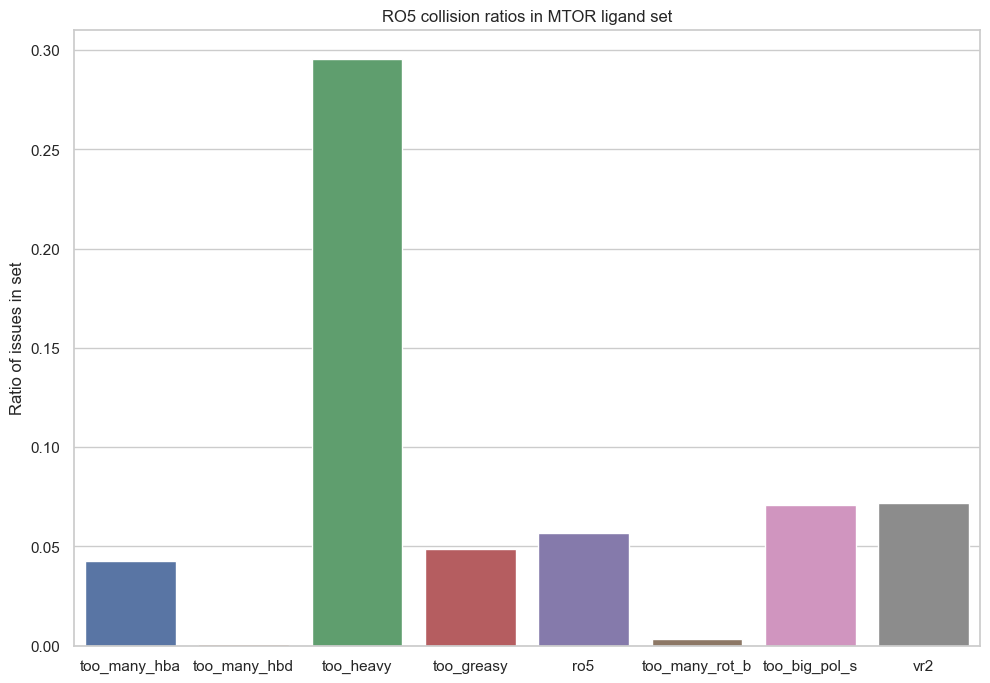

In [17]:
sns.set(rc={'figure.figsize':(11.7, 8)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=mtor_data, ci=None)
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

C:\Users\pslav\AppData\Local\Temp\ipykernel_9404\212672821.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(data=drugbank_data, ci=None)


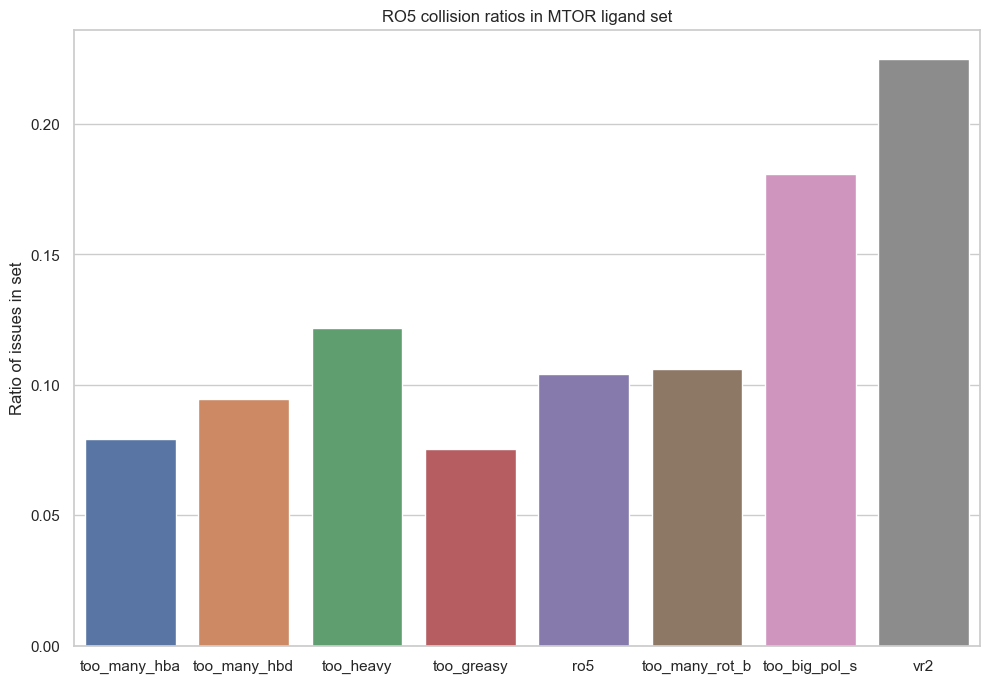

In [18]:
sns.set(rc={'figure.figsize':(11.7, 8)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=drugbank_data, ci=None)
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

In [19]:
mol = drugbank_data['mol'][0] 

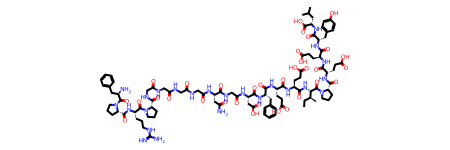

In [20]:
mol

In [21]:
# SUBSTRUCTURES in SMARTS
groups = {'carb': Chem.MolFromSmarts("OC=O"), 'benz': Chem.MolFromSmarts("c1ccccc1"), 'conj': Chem.MolFromSmarts("C=CC=CC=C"), 'cum': Chem.MolFromSmarts("*=C=*")}

In [22]:
def has_sub(mol):
    return{k: len(mol.GetSubstructMatches(i)) for k,i in groups.items()}

In [27]:
has_sub(mol)

{'carb': 6, 'benz': 3, 'conj': 0, 'cum': 0}

In [44]:
substr = mtor_data['mol'].apply(lambda x: has_sub(x)).apply(pd.Series)

In [46]:
#substr

In [47]:
mtor_data = mtor_data.join(substr)

In [48]:
mtor_data

,mol,source,too_many_hba,too_many_hbd,too_heavy,too_greasy,ro5,too_many_rot_b,too_big_pol_s,vr2,carb,benz,conj,cum
0,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
1,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
2,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
3,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
4,<rdkit.Chem.rdchem.Mol object at 0x000001A14C9...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False,0,1,0,0
4592,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False,0,1,0,0
4593,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False,0,2,0,0
4594,<rdkit.Chem.rdchem.Mol object at 0x000001A15A6...,mtor,0,0,0,0,False,0,0,False,0,1,0,0
